In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import sys
import variable_encode as var_encode
import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score, auc, roc_curve,precision_score,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import variable_bin_methods as vbm
import pickle
import copy
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import GridSearchCV

# 读取数据

In [2]:
data_train_1 = pd.read_excel('最终2018年改变分箱最后19个特征数据的分箱.xlsx')
data_test_1 = pd.read_excel('最终2019年-1改变分箱最后19个特征数据的分箱.xlsx')
data_test_2 = pd.read_excel('最终2019年-2改变分箱最后19个特征数据的分箱.xlsx')
data_test_3 = pd.read_excel('最终2019年-3改变分箱最后19个特征数据的分箱.xlsx')
data_test_4 = pd.read_excel('最终2019年-4改变分箱最后19个特征数据的分箱.xlsx')

In [3]:
data_train_1 = data_train_1.drop(columns = ['mths_since_recent_inq'])
data_test_1 = data_test_1.drop(columns = ['mths_since_recent_inq'])
data_test_2 = data_test_2.drop(columns = ['mths_since_recent_inq'])
data_test_3 = data_test_3.drop(columns = ['mths_since_recent_inq'])
data_test_4 = data_test_4.drop(columns = ['mths_since_recent_inq'])

In [4]:
    ####取出训练数据与测试数据
var_all = list(data_train_1.columns)
var_all.remove('loan_status')

# 变量归一化

In [5]:
####变量归一化
scaler = StandardScaler().fit(data_train_1[var_all])
data_train_1[var_all] = scaler.transform(data_train_1[var_all])  
data_test_1[var_all] = scaler.transform(data_test_1[var_all])
data_test_2[var_all] = scaler.transform(data_test_2[var_all])
data_test_3[var_all] = scaler.transform(data_test_3[var_all])
data_test_4[var_all] = scaler.transform(data_test_4[var_all])
    
x_train = np.array(data_train_1[var_all])
y_train = np.array(data_train_1.loan_status)
    
x_test_1 = np.array(data_test_1[var_all])
y_test_1 = np.array(data_test_1.loan_status)

x_test_2 = np.array(data_test_2[var_all])
y_test_2 = np.array(data_test_2.loan_status)

x_test_3 = np.array(data_test_3[var_all])
y_test_3 = np.array(data_test_3.loan_status)

x_test_4 = np.array(data_test_4[var_all])
y_test_4 = np.array(data_test_4.loan_status)     

# 模型训练

In [6]:
GBDT_model= GradientBoostingClassifier(subsample=0.8,max_features=0.8, validation_fraction=0.1, 
                                                      n_iter_no_change =3,random_state=0 ,
                                        n_estimators=50,
                                        max_depth=4,
                                        learning_rate=0.41)

In [7]:
GBDT_model_fit = GBDT_model.fit(x_train, y_train)

## 模型预测

In [8]:
y_pred = GBDT_model_fit.predict(x_train)
y_proba = GBDT_model_fit.predict_proba(x_train)

In [9]:
y_pred_1 = GBDT_model_fit.predict(x_test_1)
y_proba_1 = GBDT_model_fit.predict_proba(x_test_1)
y_pred_2 = GBDT_model_fit.predict(x_test_2)
y_proba_2 = GBDT_model_fit.predict_proba(x_test_2)
y_pred_3 = GBDT_model_fit.predict(x_test_3)
y_proba_3 = GBDT_model_fit.predict_proba(x_test_3)
y_pred_4 = GBDT_model_fit.predict(x_test_4)
y_proba_4 = GBDT_model_fit.predict_proba(x_test_4)

# 模型评估

## 混淆矩阵

In [10]:
cnf_matrix = confusion_matrix(y_train,y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix

预测为好   预测为坏
标签为好  187235   7468
标签为坏   55143  10303

In [11]:
cnf_matrix1 = confusion_matrix(y_test_1,y_pred_1)
cnf_matrix1 = pd.DataFrame(cnf_matrix1,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix1

预测为好  预测为坏
标签为好  23467   750
标签为坏   8308  1094

In [12]:
cnf_matrix2 = confusion_matrix(y_test_2,y_pred_2)
cnf_matrix2 = pd.DataFrame(cnf_matrix2,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix2

预测为好  预测为坏
标签为好  23249   876
标签为坏   8349  1121

In [13]:
cnf_matrix3 = confusion_matrix(y_test_3,y_pred_3)
cnf_matrix3 = pd.DataFrame(cnf_matrix3,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix3

预测为好  预测为坏
标签为好  23699   849
标签为坏   8168  1076

In [14]:
cnf_matrix4 = confusion_matrix(y_test_4,y_pred_4)
cnf_matrix4 = pd.DataFrame(cnf_matrix4,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix4

预测为好  预测为坏
标签为好  23362   796
标签为坏   8292  1091

## 评估指标

In [15]:
acc_GBDT = accuracy_score(y_train,y_pred)
kappa_GBDT = cohen_kappa_score(y_train,y_pred)
auc_GBDT = roc_auc_score(y_train, y_proba[:,1])
fpr_GBDT, tpr_GBDT, thresholds_roc_GBDT = roc_curve(y_train,y_proba[:,1])
ks_GBDT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_GBDT, fpr_GBDT)])
results = pd.DataFrame()
results['准确率'] = [acc_GBDT]
results['AUC'] = [auc_GBDT]
results['KS值'] = [ks_GBDT]
results['kappa'] = [kappa_GBDT]
results.index = ['GBDT']
results

准确率      AUC       KS值     kappa
GBDT  0.759326  0.71362  0.307775  0.157045

In [16]:
acc_GBDT = accuracy_score(y_test_1,y_pred_1)
kappa_GBDT = cohen_kappa_score(y_test_1,y_pred_1)
auc_GBDT = roc_auc_score(y_test_1, y_proba_1[:,1])
fpr_GBDT, tpr_GBDT, thresholds_roc_GBDT = roc_curve(y_test_1,y_proba_1[:,1])
ks_GBDT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_GBDT, fpr_GBDT)])
results1 = pd.DataFrame()
results1['准确率_1'] = [acc_GBDT]
results1['AUC_1'] = [auc_GBDT]
results1['KS值_1'] = [ks_GBDT]
results1['kappa_1'] = [kappa_GBDT]
results1.index = ['GBDT']
results1

准确率_1     AUC_1     KS值_1  kappa_1
GBDT  0.730569  0.702095  0.293671  0.11323

In [17]:
acc_GBDT = accuracy_score(y_test_2,y_pred_2)
kappa_GBDT = cohen_kappa_score(y_test_2,y_pred_2)
auc_GBDT = roc_auc_score(y_test_2, y_proba_2[:,1])
fpr_GBDT, tpr_GBDT, thresholds_roc_GBDT = roc_curve(y_test_2,y_proba_2[:,1])
ks_GBDT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_GBDT, fpr_GBDT)])
results2 = pd.DataFrame()
results2['准确率_2'] = [acc_GBDT]
results2['AUC_2'] = [auc_GBDT]
results2['KS值_2'] = [ks_GBDT]
results2['kappa_2'] = [kappa_GBDT]
results2.index = ['GBDT']
results2

准确率_2     AUC_2     KS值_2   kappa_2
GBDT  0.725406  0.694265  0.282778  0.107932

In [18]:
acc_GBDT = accuracy_score(y_test_3,y_pred_3)
kappa_GBDT = cohen_kappa_score(y_test_3,y_pred_3)
auc_GBDT = roc_auc_score(y_test_3, y_proba_3[:,1])
fpr_GBDT, tpr_GBDT, thresholds_roc_GBDT = roc_curve(y_test_3,y_proba_3[:,1])
ks_GBDT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_GBDT, fpr_GBDT)])
results3 = pd.DataFrame()
results3['准确率_3'] = [acc_GBDT]
results3['AUC_3'] = [auc_GBDT]
results3['KS值_3'] = [ks_GBDT]
results3['kappa_3'] = [kappa_GBDT]
results3.index = ['GBDT']
results3

准确率_3     AUC_3     KS值_3   kappa_3
GBDT  0.733162  0.697239  0.288923  0.108623

In [19]:
acc_GBDT = accuracy_score(y_test_4,y_pred_4)
kappa_GBDT = cohen_kappa_score(y_test_4,y_pred_4)
auc_GBDT = roc_auc_score(y_test_4, y_proba_4[:,1])
fpr_GBDT, tpr_GBDT, thresholds_roc_GBDT = roc_curve(y_test_4,y_proba_4[:,1])
ks_GBDT = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_GBDT, fpr_GBDT)])
results4 = pd.DataFrame()
results4['准确率_4'] = [acc_GBDT]
results4['AUC_4'] = [auc_GBDT]
results4['KS值_4'] = [ks_GBDT]
results4['kappa_4'] = [kappa_GBDT]
results4.index = ['GBDT']
results4

准确率_4     AUC_4    KS值_4   kappa_4
GBDT  0.729048  0.695394  0.28344  0.110261

In [20]:
acc1=[results1['准确率_1'],results2['准确率_2'],results3['准确率_3'],results4['准确率_4']]
ac1=np.mean(acc1)
bc1=np.std(acc1)

In [21]:
acc2=[results1['AUC_1'],results2['AUC_2'],results3['AUC_3'],results4['AUC_4']]
ac2=np.mean(acc2)
bc2=np.std(acc2)

In [22]:
acc3=[results1['KS值_1'],results2['KS值_2'],results3['KS值_3'],results4['KS值_4']]
ac3=np.mean(acc3)
bc3=np.std(acc3)

In [23]:
acc4=[results1['kappa_1'],results2['kappa_2'],results3['kappa_3'],results4['kappa_4']]
ac4=np.mean(acc4)
bc4=np.std(acc4)

In [24]:
results11 =pd.DataFrame({'准确率的均值':{'GBDT':ac1},'准确率的方差':{'GBDT':bc1},
                   'AUC的均值':{'GBDT':ac2},'KS值的均值':{'GBDT':ac3},
                   'kappa的均值':{'GBDT':ac4}})
results11

准确率的均值    准确率的方差    AUC的均值    KS值的均值  kappa的均值
GBDT  0.729546  0.002807  0.697248  0.287203  0.110012

## ROC和KS曲线

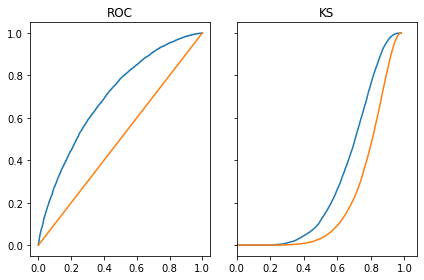

In [25]:
y_proba_GBDT_1= y_proba_1
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr,tpr,thresholds = roc_curve(y_test_1,y_proba_GBDT_1[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

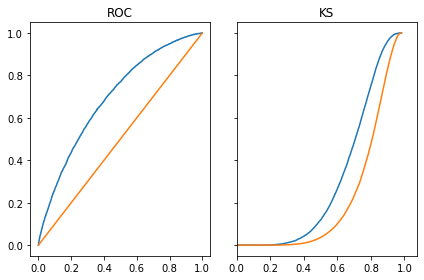

In [26]:
y_proba_GBDT_2= y_proba_2
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_2))):
    fpr,tpr,thresholds = roc_curve(y_test_2,y_proba_GBDT_2[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

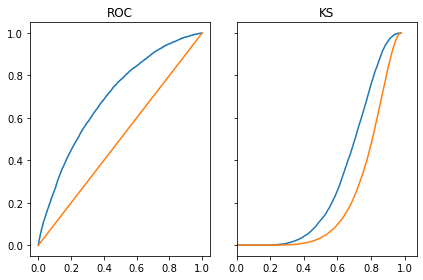

In [27]:
y_proba_GBDT_3= y_proba_3
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_3))):
    fpr,tpr,thresholds = roc_curve(y_test_3,y_proba_GBDT_3[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

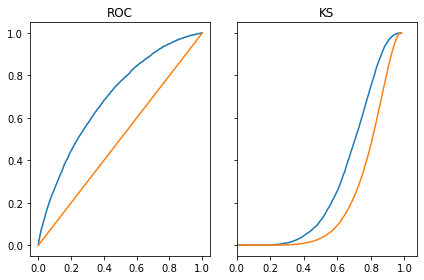

In [28]:
y_proba_GBDT_4= y_proba_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_4))):
    fpr,tpr,thresholds = roc_curve(y_test_4,y_proba_GBDT_4[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

In [29]:
y_proba_GBDT_1= y_proba_1
y_proba_GBDT_2= y_proba_2
y_proba_GBDT_3= y_proba_3
y_proba_GBDT_4= y_proba_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr_1,tpr_1,thresholds_1 = roc_curve(y_test_1,y_proba_GBDT_1[:,i],pos_label = i)
for i in range(len(np.unique(y_test_2))):
    fpr_2,tpr_2,thresholds_2 = roc_curve(y_test_2,y_proba_GBDT_2[:,i],pos_label = i)
for i in range(len(np.unique(y_test_3))):
    fpr_3,tpr_3,thresholds_3 = roc_curve(y_test_3,y_proba_GBDT_3[:,i],pos_label = i)
for i in range(len(np.unique(y_test_4))):
    fpr_4,tpr_4,thresholds_4 = roc_curve(y_test_4,y_proba_GBDT_4[:,i],pos_label = i)    
axe1.plot(fpr_1,tpr_1)
axe1.plot(fpr_2,tpr_2)
axe1.plot(fpr_3,tpr_3)
axe1.plot(fpr_4,tpr_4)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds_1,tpr_1,label = 'TPR')
axe2.plot(1 - thresholds_1,fpr_1,label = 'FPR')
axe2.plot(1 - thresholds_2,tpr_2,label = 'TPR')
axe2.plot(1 - thresholds_2,fpr_2,label = 'FPR')
axe2.plot(1 - thresholds_3,tpr_3,label = 'TPR')
axe2.plot(1 - thresholds_3,fpr_3,label = 'FPR')
axe2.plot(1 - thresholds_4,tpr_4,label = 'TPR')
axe2.plot(1 - thresholds_4,fpr_4,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

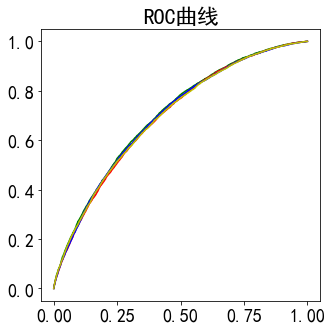

In [30]:
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('ROC曲线')
plt.plot(fpr_1,tpr_1,color='g',label="ROC_1")
plt.plot(fpr_2,tpr_2,color='r',label="ROC_2")
plt.plot(fpr_3,tpr_3,color='b',label="ROC_3")
plt.plot(fpr_4,tpr_4,color='y',label="ROC_4")
plt.show()

In [31]:
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('KS曲线')
plt.plot(1 - thresholds_1,tpr_1,color='g',label='TPR')
plt.plot(1 - thresholds_1,fpr_1,color='g',label='FPR')
plt.plot(1 - thresholds_2,tpr_2,color='r',label='TPR')
plt.plot(1 - thresholds_2,fpr_2,color='r',label='FPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='TPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='FPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='TPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='FPR')
plt.xlim(0,)
plt.show()

##  k折交叉检验

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore") ##忽略警告

In [33]:
#ef muti_score(model):
warnings.filterwarnings('ignore')
accuracy = cross_val_score(GBDT_model, x_train, y_train, scoring='accuracy', cv=5)
acc_mean=accuracy.mean()
acc_std=accuracy.std()
results = pd.DataFrame()
results["准确率均值"] = [acc_mean]
results["准确率标准差"] = [acc_std]
results.index = ['GBDT']
results
#rint("准确率均值",accuracy.mean())
#rint("准确率方差",accuracy.var())

准确率均值    准确率标准差
GBDT  0.75767  0.000926

## 模型psi的计算

In [34]:
def cal_psi(actual, predict, bins=10):
    actual_min = actual.min()  # 实际中的最小概率
    actual_max = actual.max()  # 实际中的最大概率
    binlen = (actual_max - actual_min) / bins
    cuts = [actual_min + i * binlen for i in range(1, bins)]#设定分组
    cuts.insert(0, -float("inf"))
    cuts.append(float("inf"))
    actual_cuts = np.histogram(actual, bins=cuts)#将actual等宽分箱
    predict_cuts = np.histogram(predict, bins=cuts)#将predict按actual的分组等宽分箱
    actual_df = pd.DataFrame(actual_cuts[0],columns=['actual'])
    predict_df = pd.DataFrame(predict_cuts[0], columns=['predict'])
    psi_df = pd.merge(actual_df,predict_df,right_index=True,left_index=True)
    psi_df['actual_rate'] = (psi_df['actual'] + 1) / psi_df['actual'].sum()#计算占比，分子加1，防止计算PSI时分子分母为0
    psi_df['predict_rate'] = (psi_df['predict'] + 1) / psi_df['predict'].sum()
    psi_df['psi'] = (psi_df['actual_rate'] - psi_df['predict_rate']) * np.log(
        psi_df['actual_rate'] / psi_df['predict_rate'])
    psi = psi_df['psi'].sum()
    return psi, psi_df

In [35]:
psi_values11=cal_psi(y_proba[:,1], y_proba_1[:,1],10)
psi_values11

(0.004317476889864848,
    actual  predict  actual_rate  predict_rate       psi
 0   37271     4980     0.143272      0.148160  0.000164
 1   72075     9548     0.277057      0.284036  0.000174
 2   60175     8102     0.231314      0.241024  0.000399
 3   40702     5163     0.156460      0.153604  0.000053
 4   25466     3142     0.097894      0.093489  0.000203
 5   13872     1648     0.053327      0.049050  0.000358
 6    6729      688     0.025870      0.020494  0.001252
 7    2935      281     0.011286      0.008388  0.000860
 8     849       64     0.003267      0.001933  0.000700
 9      75        3     0.000292      0.000119  0.000156)

In [36]:
psi_values12=cal_psi(y_proba[:,1], y_proba_2[:,1],10)
psi_values12

(0.002402465205469028,
    actual  predict  actual_rate  predict_rate       psi
 0   37271     4972     0.143272      0.148028  0.000155
 1   72075     9526     0.277057      0.283584  0.000152
 2   60175     7870     0.231314      0.234291  0.000038
 3   40702     5184     0.156460      0.154338  0.000029
 4   25466     3202     0.097894      0.095342  0.000067
 5   13872     1710     0.053327      0.050930  0.000110
 6    6729      781     0.025870      0.023277  0.000274
 7    2935      275     0.011286      0.008216  0.000975
 8     849       72     0.003267      0.002173  0.000446
 9      75        3     0.000292      0.000119  0.000155)

In [37]:
psi_values13=cal_psi(y_proba[:,1], y_proba_3[:,1],10)
psi_values13

(0.004337324459779135,
    actual  predict  actual_rate  predict_rate       psi
 0   37271     5149     0.143272      0.152403  0.000564
 1   72075     9589     0.277057      0.283795  0.000162
 2   60175     7888     0.231314      0.233458  0.000020
 3   40702     5316     0.156460      0.157345  0.000005
 4   25466     3172     0.097894      0.093898  0.000167
 5   13872     1605     0.053327      0.047526  0.000668
 6    6729      745     0.025870      0.022076  0.000602
 7    2935      259     0.011286      0.007694  0.001376
 8     849       65     0.003267      0.001953  0.000676
 9      75        4     0.000292      0.000148  0.000098)

In [38]:
psi_values14=cal_psi(y_proba[:,1], y_proba_4[:,1],10)
psi_values14

(0.003796037918920037,
    actual  predict  actual_rate  predict_rate       psi
 0   37271     5131     0.143272      0.153007  0.000640
 1   72075     9467     0.277057      0.282281  0.000098
 2   60175     7842     0.231314      0.233833  0.000027
 3   40702     5286     0.156460      0.157628  0.000009
 4   25466     3135     0.097894      0.093498  0.000202
 5   13872     1602     0.053327      0.047792  0.000607
 6    6729      722     0.025870      0.021556  0.000787
 7    2935      278     0.011286      0.008318  0.000905
 8     849       75     0.003267      0.002266  0.000367
 9      75        3     0.000292      0.000119  0.000155)

In [39]:
bcc2=[psi_values11[0],psi_values12[0],psi_values13[0],psi_values14[0]]
bbc2=np.mean(bcc2)
bbc2

0.0037133261185082617

In [40]:
results111 =pd.DataFrame({'PSI':{'GBDT':bbc2},'PSI_1':{'GBDT':psi_values11[0]},'PSI_2':{'GBDT':psi_values12[0]},
                   'PSI_3':{'GBDT':psi_values13[0]},'PSI_4':{'GBDT':psi_values14[0]}})
results111

PSI     PSI_1     PSI_2     PSI_3     PSI_4
GBDT  0.003713  0.004317  0.002402  0.004337  0.003796